In [ ]:
Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [1]:
import pandas as pd
import numpy as np

In [6]:
df= pd.read_csv('C:/Users/jyoti/Documents/Engineering Third Year/DSBDAL/datasets/Academic_performance.csv')

In [7]:
missing_values= df.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [8]:
print(f"\nUnique values in 'Gender': {df['gender'].unique()}")
print(f"Unique values in 'Semester': {df['Semester'].unique()}")
print(f"Unique values in 'Relation': {df['Relation'].unique()}")
print(f"Unique values in 'ParentAnsweringSurvey': {df['ParentAnsweringSurvey'].unique()}")
print(f"Unique values in 'ParentschoolSatisfaction': {df['ParentschoolSatisfaction'].unique()}")


Unique values in 'Gender': ['M' 'F']
Unique values in 'Semester': ['F' 'S']
Unique values in 'Relation': ['Father' 'Mum']
Unique values in 'ParentAnsweringSurvey': ['Yes' 'No']
Unique values in 'ParentschoolSatisfaction': ['Good' 'Bad']


In [14]:
def detect_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

discussion_outliers = detect_outliers(df, 'Discussion')

print(f"\nOutliers in 'Discussion':\n{discussion_outliers}")


Outliers in 'Discussion':
Empty DataFrame
Columns: [gender, NationalITy, PlaceofBirth, StageID, GradeID, SectionID, Topic, Semester, Relation, raisedhands, VisITedResources, AnnouncementsView, Discussion, ParentAnsweringSurvey, ParentschoolSatisfaction, StudentAbsenceDays, Class]
Index: []


In [16]:
df_cleaned = df[~df['Discussion'].isin(discussion_outliers['Discussion'])]
print(f"\nCleaned Dataframe:\n{df_cleaned}")


Cleaned Dataframe:
    gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        F   Father           15               

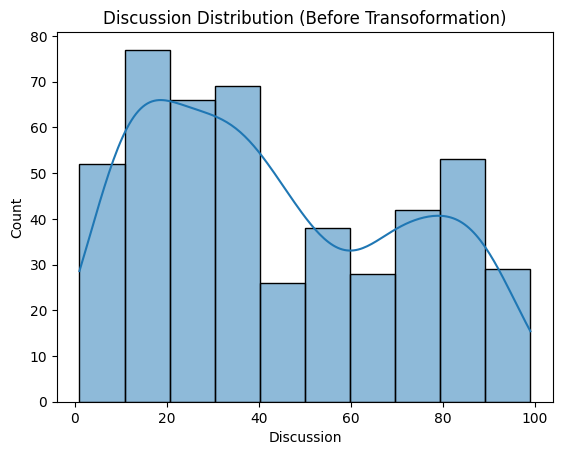

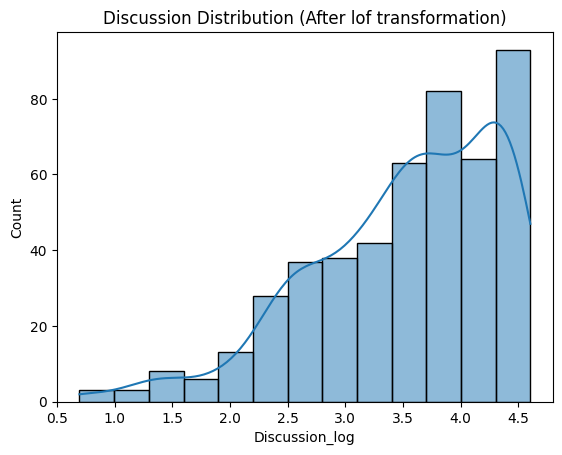

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Discussion'], kde= True)
plt.title("Discussion Distribution (Before Transoformation)")
plt.show()

df['Discussion_log'] = np.log(df['Discussion'] + 1)

sns.histplot(df['Discussion_log'], kde = True)
plt.title("Discussion Distribution (After lof transformation)")
plt.show()